In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [2]:
n = 10 #nb des noeuds
k = 60  #nb des itérations
c = 1/(n+1)

a1 = 30 #longueur de l'espace
b1 = 20 #largeur de l'espace

r_det = ( ((a1**2+b1**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [3]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    #A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)
    A = np.multiply(H,W)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*A[i][j]
            y[i] += (y[j]-y[i])*A[i][j]
            
    return x,y


In [4]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]

y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]



 matrice adjacence 
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 laplacienne 
 [[ 4.  0.  0. -1.  0. -1.  0. -1. -1.  0.]
 [ 0.  4.  0. -1. -1.  0.  0. -1. -1.  0.]
 [ 0.  0.  2.  0.  0.  0. -1.  0.  0. -1.]
 [-1. -1.  0.  7.  0. -1. -1. -1. -1. -1.]
 [ 0. -1.  0.  0.  2.  0.  0.  0. -1.  0.]
 [-1.  0.  0. -1.  0.  5. -1. -1. -1.  0.]
 [ 0.  0. -1. -1.  0. -1.  5. -1.  0. -1.]
 [-1. -1.  0. -1.  0. -1. -1.  7. -1. -1.]
 [-1. -1.  0. -1. -1. -1.  0. -1.  6.  0.]
 [ 0.  0. -1. -1.  0.  0. -1. -1.  0.  4.]]


 P 
 [[0.63636364 0.         0.         0.09090909 0.         0.09090909
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.63636364 0.         0.09090909 0.09090909 0.
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.         0.81818182 0.         0.         0.
  0.090909

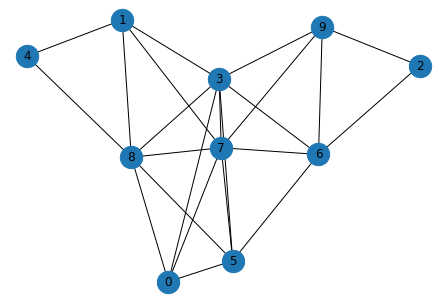

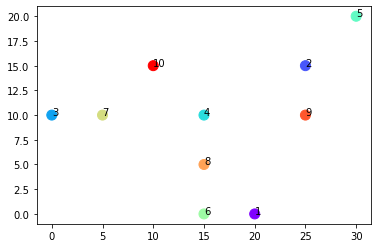

In [5]:

M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
print("\n\n P \n",P)

print("\n\n P \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W


S = S.sum(axis=0)/n
print("\n\n convergence W \n",S)

A1 = matriceCom(H,S)
print("\n\n convergence A \n",A1)

#matrice de communication

A = matriceCom(H,W)
print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

In [6]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[-4.44089210e-16  1.16088296e+00  2.03237741e+00  3.90876698e+00
  4.26150922e+00  5.00000000e+00  6.28113763e+00  7.07055190e+00
  8.00000000e+00  8.28477390e+00]


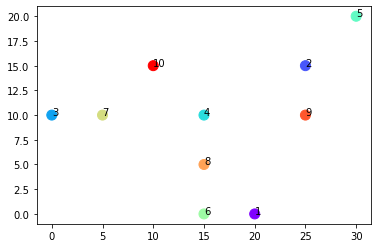

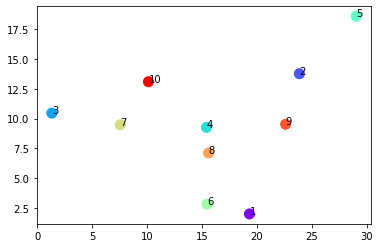

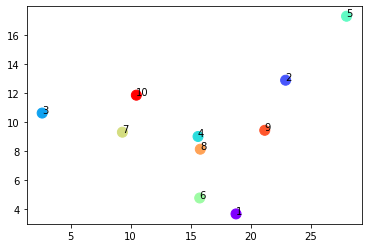

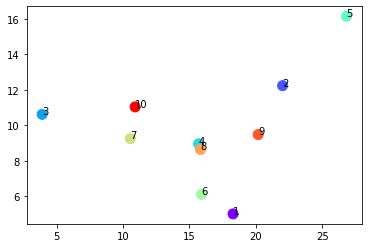

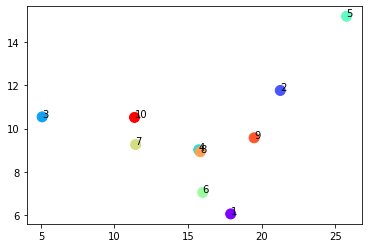

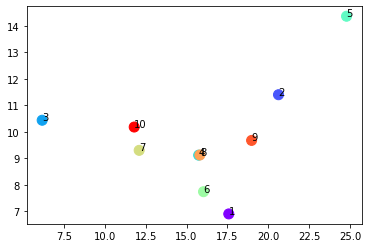

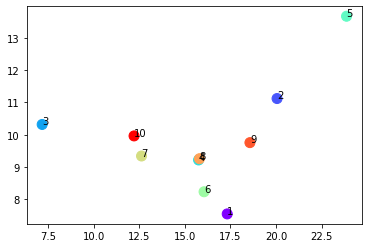

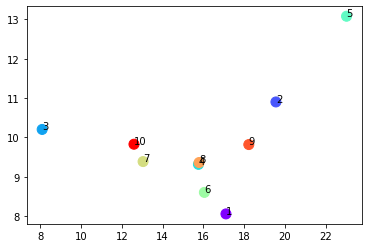

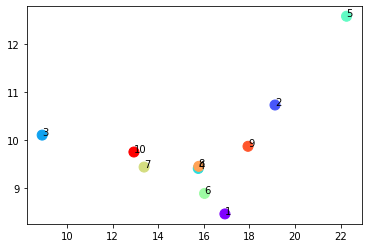

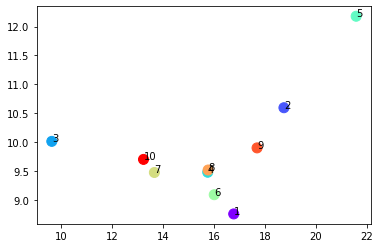

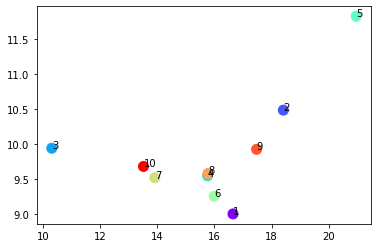

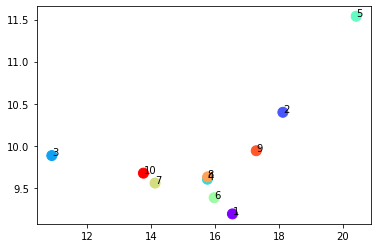

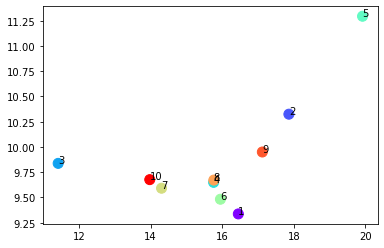

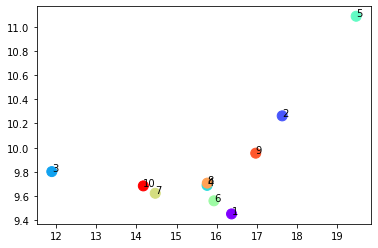

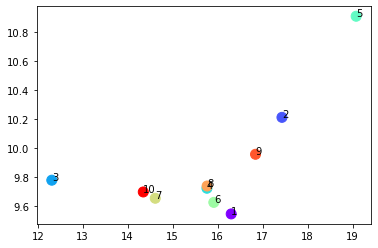

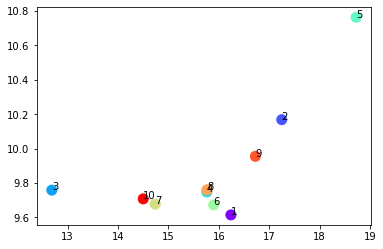

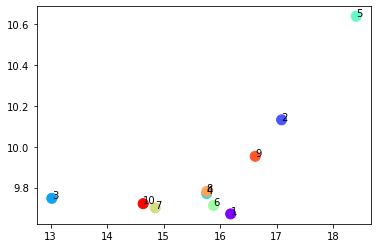

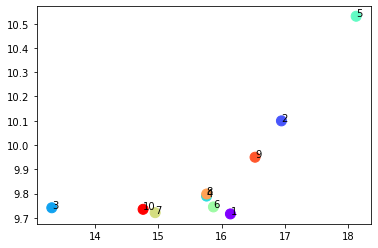

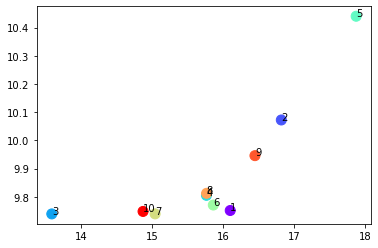

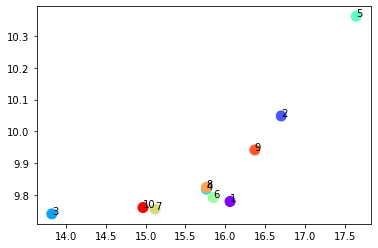

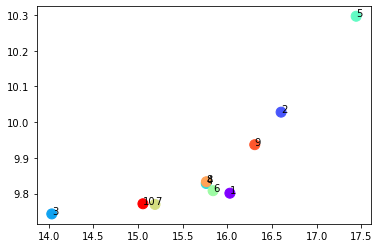

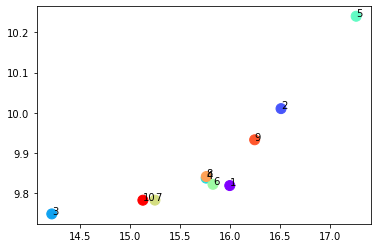

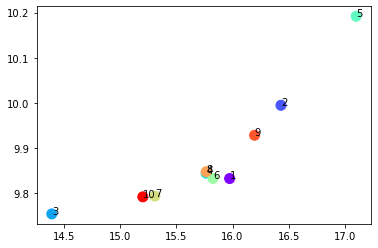

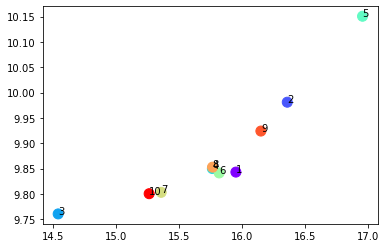

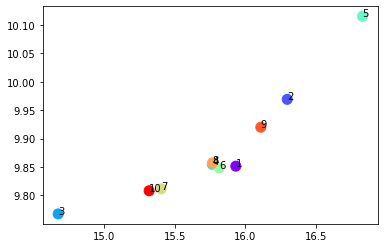

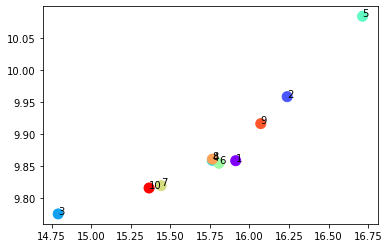

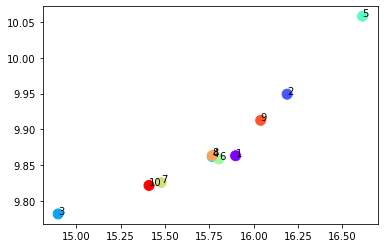

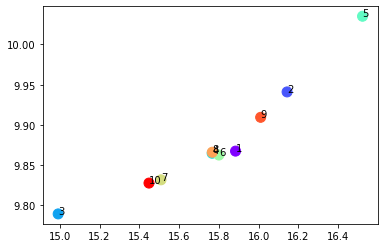

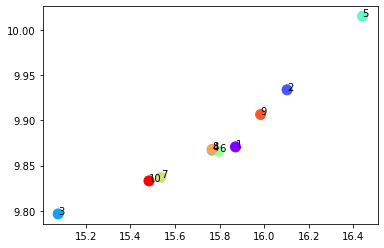

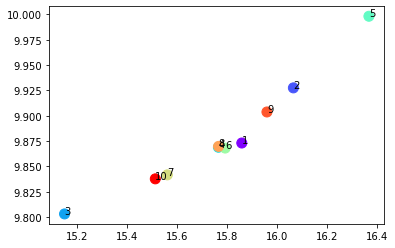

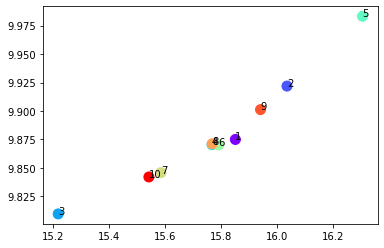

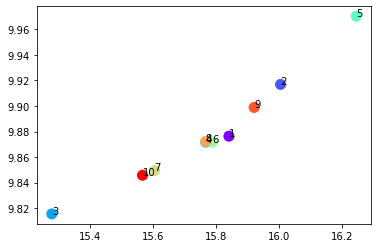

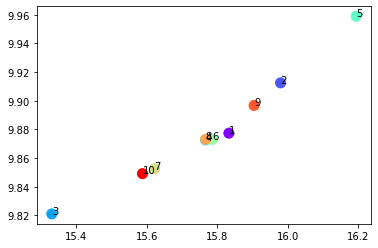

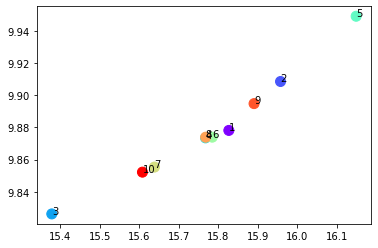

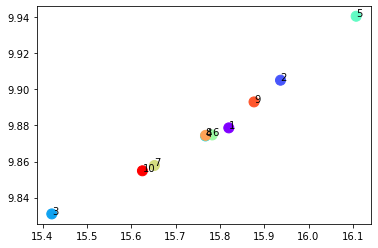

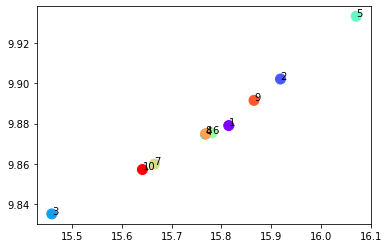

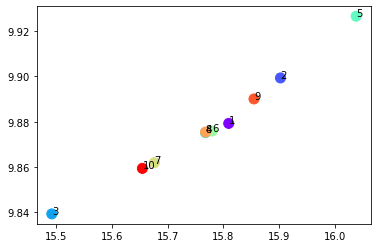

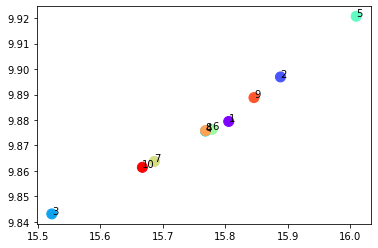

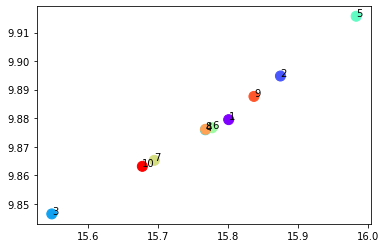

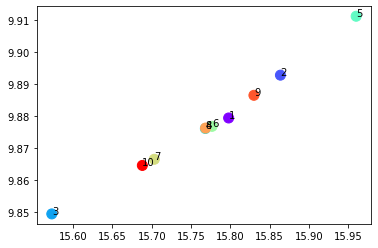

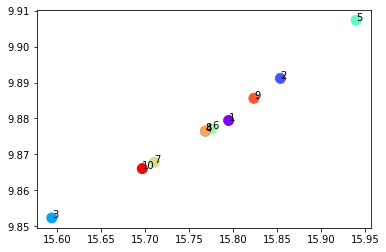

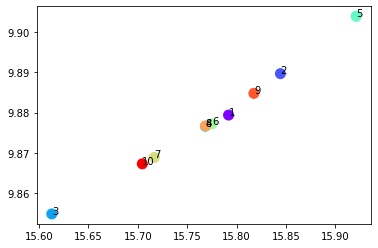

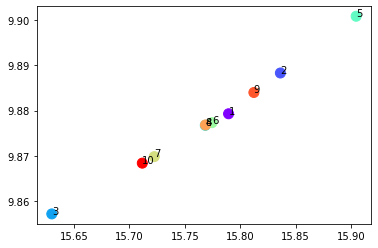

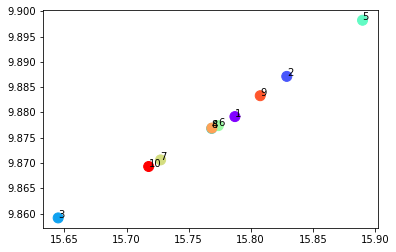

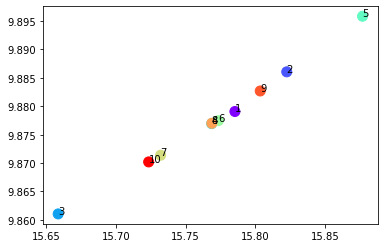

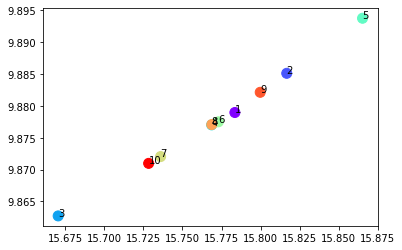

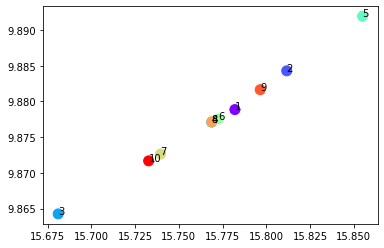

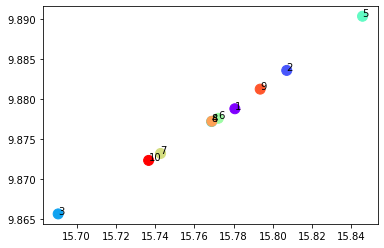

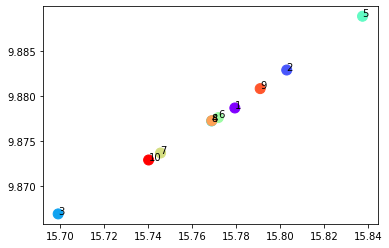

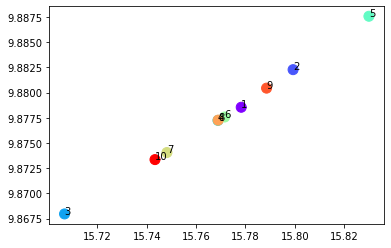

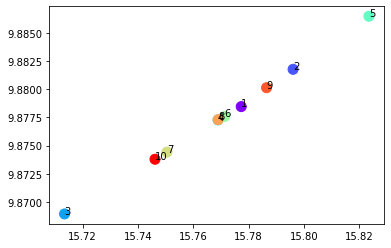

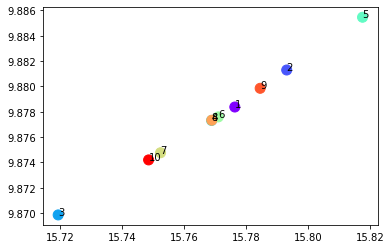

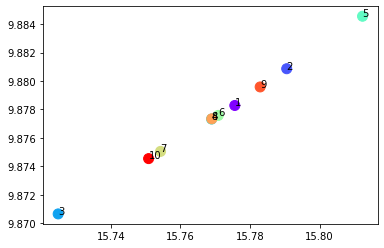

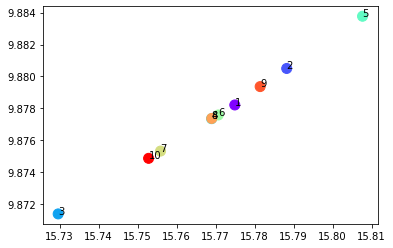

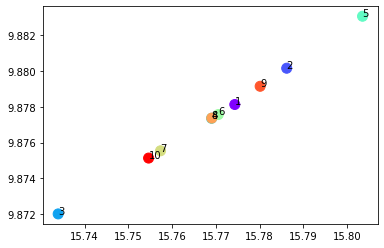

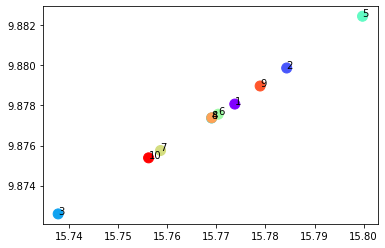

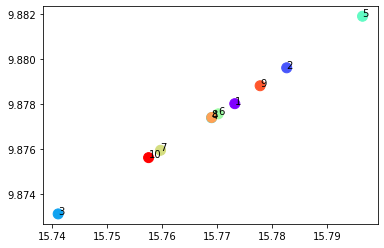

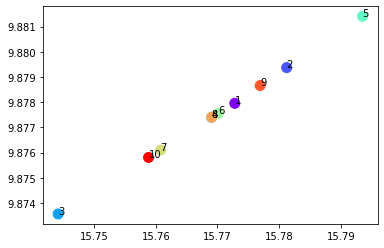

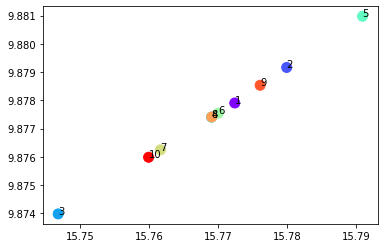

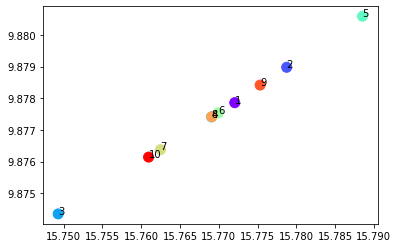



 matrice de priorité 
 [[0.10949701 0.11133929 0.12330657 0.1052315  0.07483976 0.07762991
  0.09945277 0.07461385 0.1408845  0.08320484]
 [0.10949126 0.11133325 0.12331706 0.1052182  0.07486044 0.07763378
  0.09944001 0.07460619 0.14087208 0.08322772]
 [0.10951851 0.11136182 0.12326748 0.10528062 0.07476363 0.07761661
  0.09949892 0.07464228 0.14092977 0.08312035]
 [0.10949923 0.11134162 0.12330253 0.10523655 0.07483194 0.07762859
  0.09945747 0.07461678 0.14088913 0.08319615]
 [0.10948262 0.11132418 0.12333283 0.10519823 0.07489147 0.07763951
  0.09942092 0.07459469 0.14085347 0.08326206]
 [0.10949897 0.11134134 0.123303   0.10523598 0.07483282 0.0776287
  0.09945698 0.07461644 0.14088863 0.08319713]
 [0.1095065  0.11134923 0.12328932 0.10525319 0.07480615 0.07762402
  0.09947316 0.0746264  0.14090449 0.08316754]
 [0.10949923 0.11134162 0.12330253 0.10523655 0.07483194 0.07762859
  0.09945747 0.07461678 0.14088913 0.08319615]
 [0.10949357 0.11133567 0.12331286 0.10522353 0.07485216

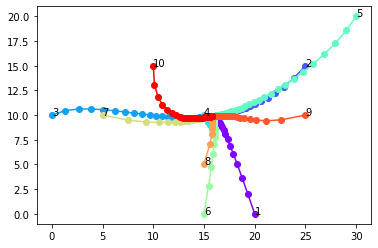

In [7]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    #P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,P)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [8]:
print("\n AA \n",AA)
print("\nConvergence de A \n",np.linalg.matrix_power(AA, 100))

print("\n Convergence des priorité \n",S)


 AA 
 [[0.         0.         0.         0.1052315  0.         0.07762991
  0.         0.07461385 0.1408845  0.        ]
 [0.         0.         0.         0.1052182  0.07486044 0.
  0.         0.07460619 0.14087208 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.09949892 0.         0.         0.08312035]
 [0.10949923 0.11134162 0.         0.         0.         0.07762859
  0.09945747 0.07461678 0.14088913 0.08319615]
 [0.         0.11132418 0.         0.         0.         0.
  0.         0.         0.14085347 0.        ]
 [0.10949897 0.         0.         0.10523598 0.         0.
  0.09945698 0.07461644 0.14088863 0.        ]
 [0.         0.         0.12328932 0.10525319 0.         0.07762402
  0.         0.0746264  0.         0.08316754]
 [0.10949923 0.11134162 0.         0.10523655 0.         0.07762859
  0.09945747 0.         0.14088913 0.08319615]
 [0.10949357 0.11133567 0.         0.10522353 0.07485216 0.07763224
  0.         0.07460926 0.         0.

In [9]:
XX = (a[0]*S).sum(axis=0)
Y = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",XX)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Y)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.772066   15.77876061 15.74929071 15.76907228 15.78854338 15.76993292
 15.76249092 15.76909378 15.77533708 15.76095127]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [9.87785887 9.87897639 9.87434643 9.87740923 9.88058825 9.8775335
 9.87637638 9.87741461 9.87841507 9.87614089]


In [10]:
print("\n AA \n",AA)
print("\n AA \n",A1)


 AA 
 [[0.         0.         0.         0.1052315  0.         0.07762991
  0.         0.07461385 0.1408845  0.        ]
 [0.         0.         0.         0.1052182  0.07486044 0.
  0.         0.07460619 0.14087208 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.09949892 0.         0.         0.08312035]
 [0.10949923 0.11134162 0.         0.         0.         0.07762859
  0.09945747 0.07461678 0.14088913 0.08319615]
 [0.         0.11132418 0.         0.         0.         0.
  0.         0.         0.14085347 0.        ]
 [0.10949897 0.         0.         0.10523598 0.         0.
  0.09945698 0.07461644 0.14088863 0.        ]
 [0.         0.         0.12328932 0.10525319 0.         0.07762402
  0.         0.0746264  0.         0.08316754]
 [0.10949923 0.11134162 0.         0.10523655 0.         0.07762859
  0.09945747 0.         0.14088913 0.08319615]
 [0.10949357 0.11133567 0.         0.10522353 0.07485216 0.07763224
  0.         0.07460926 0.         0.

In [11]:
print(S)

[0.10949954 0.11134193 0.12330199 0.1052372  0.07483095 0.07762848
 0.09945802 0.07461717 0.14088969 0.08319504]


In [12]:
print(A1.sum(axis=0)/n,A1.sum(axis=1))

[0.04379981 0.04453677 0.0246604  0.07366604 0.01496619 0.03881424
 0.04972901 0.05223202 0.08453381 0.03327801] [0.39837253 0.39557501 0.18265305 0.69662985 0.25223162 0.52970161
 0.46397987 0.72724989 0.55315527 0.40261438]


In [13]:
print(b[0])

[ 0. 15. 10. 10. 20.  0. 10.  5. 10. 15.]


In [14]:
AC =A1.sum(axis=0)/n

In [15]:
XXX = (a[0]*AC).sum(axis=0)
YY = (b[0]*AC).sum(axis=0)


print("Prédiction de l'abscice final\n",XXX)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",YY)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 7.603856242671865

 Abscisse final de chaque agent :  
 [15.772066   15.77876061 15.74929071 15.76907228 15.78854338 15.76993292
 15.76249092 15.76909378 15.77533708 15.76095127]

Prédiction de l'ordonné final
 4.053598308554276

 Ordonné final de chaque agent :  
 [9.87785887 9.87897639 9.87434643 9.87740923 9.88058825 9.8775335
 9.87637638 9.87741461 9.87841507 9.87614089]
